# Análisis para la empresa Showz 
## Descripción del Proyecto 
En el presente ejercicio se lllevará a cabo el análisis y visualización de datos, de métricas de negocio y de usuario con el propósito de elaborar indicadores clave de desempeño que permitan a la empresa tomar decisiones encaminadas a mejorar su rendimiento. Para ello, este proyecto se dividirá en las siguientes fases: 

- **Preparación de datos para el Análisis:** Se cargarán las bases de datos que se utilizarán y se verificará que éstos estén en orden para su respectivo análisis.
- **Cálculo de métricas y elaboración de informes:** Se llevará a cabo un análisis puntual sobre las visitas, las ventas y la estrategia de marketing implementada por la empresa.
- **Conclusiones:** Derivado del análisis realizado, se presentarán los principales hallazgos identificados a modo de conclusión.  

### Preparación de datos para el Análisis
Comenzaremos importando nuestras liberarías necesrias y nuestras bases de datos. Posteriormente se hará una revisión de dichas bases de datos para, en su caso, realizar los ajustes necesrios. 

In [1]:
# Importamos las librerías que serán utilizadas para nuestro proyecto.
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns 

In [2]:
# Continuamos importando las bases de datos que utilizaremos, así como analizandolas y, en su caso realizando los ajustes que sean necesrios. 
visits = pd.read_csv('/datasets/visits_log_us.csv')
print(visits.head(10))
print('------------------------------------------')
visits.info()

    Device               End Ts  Source Id             Start Ts  \
,0    touch  2017-12-20 17:38:00          4  2017-12-20 17:20:00   
,1  desktop  2018-02-19 17:21:00          2  2018-02-19 16:53:00   
,2    touch  2017-07-01 01:54:00          5  2017-07-01 01:54:00   
,3  desktop  2018-05-20 11:23:00          9  2018-05-20 10:59:00   
,4  desktop  2017-12-27 14:06:00          3  2017-12-27 14:06:00   
,5  desktop  2017-09-03 21:36:00          5  2017-09-03 21:35:00   
,6  desktop  2018-01-30 12:09:00          1  2018-01-30 11:13:00   
,7    touch  2017-11-05 15:15:00          3  2017-11-05 15:14:00   
,8  desktop  2017-07-19 10:44:00          3  2017-07-19 10:41:00   
,9  desktop  2017-11-08 13:43:00          5  2017-11-08 13:42:00   
,
,                    Uid  
,0  16879256277535980062  
,1    104060357244891740  
,2   7459035603376831527  
,3  16174680259334210214  
,4   9969694820036681168  
,5  16007536194108375387  
,6   6661610529277171451  
,7  11423865690854540312  
,8   298

In [3]:
# Ajustes al primer DataFrame
visits['End Ts'] = pd.to_datetime(visits['End Ts'])
visits['Satrt Ts'] = pd.to_datetime(visits['Start Ts'])
visits['Uid'] = visits['Uid'].astype('object')
visits.info()

<class 'pandas.core.frame.DataFrame'>
,RangeIndex: 359400 entries, 0 to 359399
,Data columns (total 6 columns):
, #   Column     Non-Null Count   Dtype         
,---  ------     --------------   -----         
, 0   Device     359400 non-null  object        
, 1   End Ts     359400 non-null  datetime64[ns]
, 2   Source Id  359400 non-null  int64         
, 3   Start Ts   359400 non-null  object        
, 4   Uid        359400 non-null  object        
, 5   Satrt Ts   359400 non-null  datetime64[ns]
,dtypes: datetime64[ns](2), int64(1), object(3)
,memory usage: 16.5+ MB


Para los ajustes del primer DataFrame, los datos celdas correspondientes a valores de tiempo se ajustaron para que Python las reconociera como tiempo. Asimismo, para la celda correspondiente al ID de usuario, se cambio a tipo object ya que no se realizarán operaciones numéricas con ellos. 

In [4]:
# Segundo set de datos
orders = pd.read_csv('/datasets/orders_log_us.csv')
print(orders.head(10))
print('--------------------------------------------')
orders.info()

                Buy Ts  Revenue                   Uid
,0  2017-06-01 00:10:00    17.00  10329302124590727494
,1  2017-06-01 00:25:00     0.55  11627257723692907447
,2  2017-06-01 00:27:00     0.37  17903680561304213844
,3  2017-06-01 00:29:00     0.55  16109239769442553005
,4  2017-06-01 07:58:00     0.37  14200605875248379450
,5  2017-06-01 08:43:00     0.18  10402394430196413321
,6  2017-06-01 08:54:00     1.83  12464626743129688638
,7  2017-06-01 09:22:00     1.22   3644482766749211722
,8  2017-06-01 09:22:00     3.30  17542070709969841479
,9  2017-06-01 09:23:00     0.37   1074355127080856382
,--------------------------------------------
,<class 'pandas.core.frame.DataFrame'>
,RangeIndex: 50415 entries, 0 to 50414
,Data columns (total 3 columns):
, #   Column   Non-Null Count  Dtype  
,---  ------   --------------  -----  
, 0   Buy Ts   50415 non-null  object 
, 1   Revenue  50415 non-null  float64
, 2   Uid      50415 non-null  uint64 
,dtypes: float64(1), object(1), uint64(1)
,m

In [5]:
orders['Buy Ts'] = pd.to_datetime(orders['Buy Ts'])
orders['Uid'] = orders['Uid'].astype('object')
orders.info()

<class 'pandas.core.frame.DataFrame'>
,RangeIndex: 50415 entries, 0 to 50414
,Data columns (total 3 columns):
, #   Column   Non-Null Count  Dtype         
,---  ------   --------------  -----         
, 0   Buy Ts   50415 non-null  datetime64[ns]
, 1   Revenue  50415 non-null  float64       
, 2   Uid      50415 non-null  object        
,dtypes: datetime64[ns](1), float64(1), object(1)
,memory usage: 1.2+ MB


En este caso, nuevamente se ajustó el tipo de dato correspondiente a las celdas que contienen datos de tiempo, y el ID de usuario también se cambió a tipo object ya que no se realizarán operaciones numéricas con dichos datos. 

In [6]:
costs = pd.read_csv('/datasets/costs_us.csv')
print(costs.head(10))
print('-------------------------------------------')
costs.info()

   source_id          dt  costs
,0          1  2017-06-01  75.20
,1          1  2017-06-02  62.25
,2          1  2017-06-03  36.53
,3          1  2017-06-04  55.00
,4          1  2017-06-05  57.08
,5          1  2017-06-06  40.39
,6          1  2017-06-07  40.59
,7          1  2017-06-08  56.63
,8          1  2017-06-09  40.16
,9          1  2017-06-10  43.24
,-------------------------------------------
,<class 'pandas.core.frame.DataFrame'>
,RangeIndex: 2542 entries, 0 to 2541
,Data columns (total 3 columns):
, #   Column     Non-Null Count  Dtype  
,---  ------     --------------  -----  
, 0   source_id  2542 non-null   int64  
, 1   dt         2542 non-null   object 
, 2   costs      2542 non-null   float64
,dtypes: float64(1), int64(1), object(1)
,memory usage: 59.7+ KB


In [7]:
costs['dt'] = pd.to_datetime(costs['dt'])
costs.info()

<class 'pandas.core.frame.DataFrame'>
,RangeIndex: 2542 entries, 0 to 2541
,Data columns (total 3 columns):
, #   Column     Non-Null Count  Dtype         
,---  ------     --------------  -----         
, 0   source_id  2542 non-null   int64         
, 1   dt         2542 non-null   datetime64[ns]
, 2   costs      2542 non-null   float64       
,dtypes: datetime64[ns](1), float64(1), int64(1)
,memory usage: 59.7 KB


Para este caso, únicamente ajustamos el tipo de dato de la columna dt para que Python los reconociera como fecha. 

Es importante mencionar que no se identificaron celdas vacías. 

Una vez analizados y ajustados los tipos de datos, podemos continuar con el análisis correspondiente. 

### Cálculo de métricas y elaboración de informes

En esta sección llevaremos a cabo el análisis de diversas métricas correspondientes a las visitas, las ventas y los costos asociads al marketing. 

#### 1. Visitas 
En este campo analizaremos el comportamiento de los usuarios, identificaremos: 
- La cantidad de personas que usan la plataforma al día, a la semana y al mes.
- Las sesiones que hay por día.
- La duración de las seciones.
- La frecuencia con la que los usuarios regresan. 

La cantidad promedio de usuarios por día es de:  907.9917582417582
,La cantidad promedio de usuarios por semana es de:  5825.288461538462
,La cantidad promedio de usuarios por mes es de:  23228.416666666668


<function matplotlib.pyplot.show(close=None, block=None)>

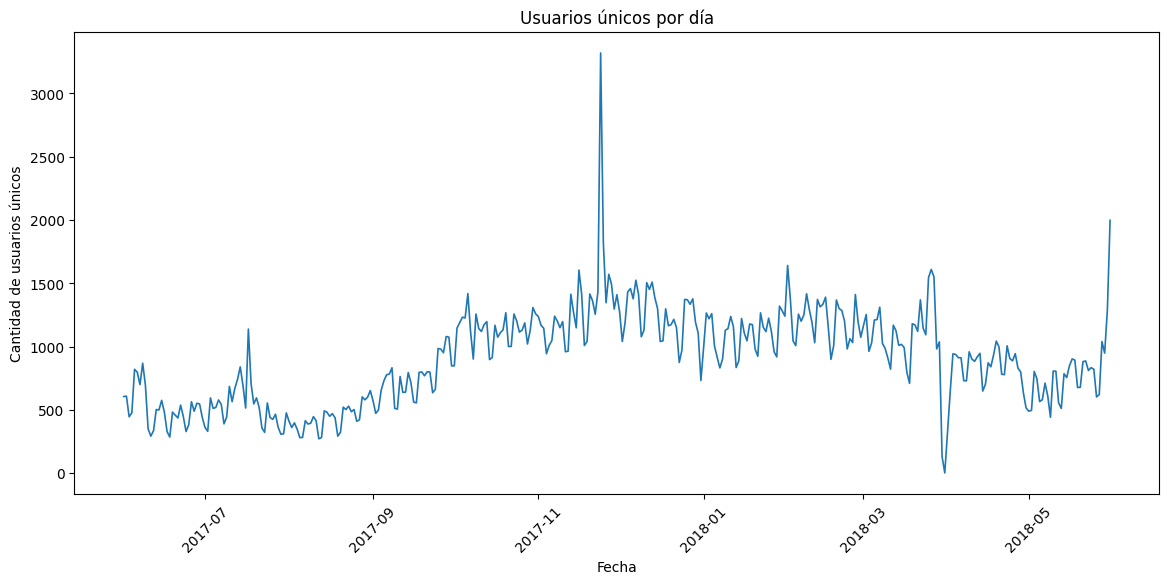

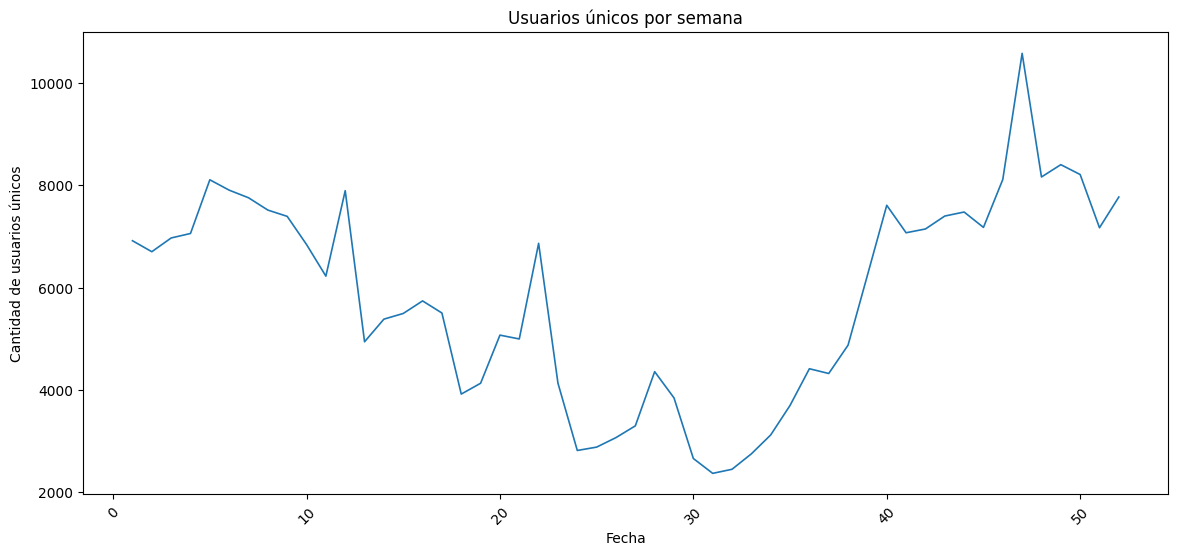

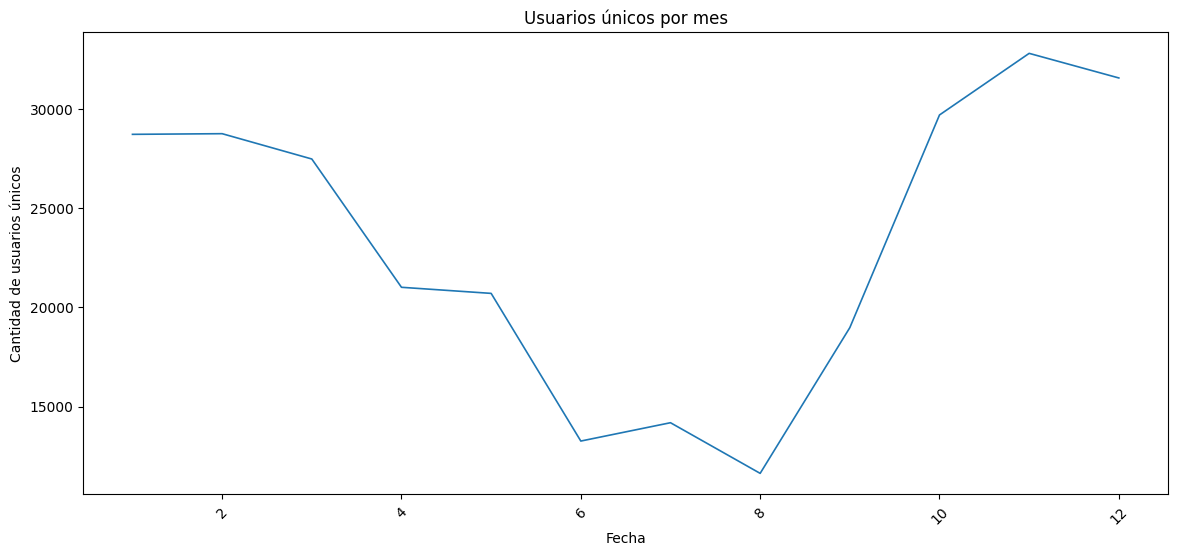

In [8]:
# Comensemos identificando la candidad de personas que usan la plataforma al día, a la semana y al mes. 
visits['Start Ts'] = pd.to_datetime(visits['Start Ts'])
visits['date'] = visits['Start Ts'].dt.date
daily_users = visits.groupby('date')['Uid'].nunique()
print('La cantidad promedio de usuarios por día es de: ',daily_users.mean())
plt.figure(figsize=(14,6))
daily_users.plot(
    kind = 'line',
    linewidth = 1.2,
    title = 'Usuarios únicos por día',
    xlabel = 'Fecha', 
    ylabel = 'Cantidad de usuarios únicos',
    rot = 45
)
plt.show
visits['week'] = visits['Start Ts'].dt.isocalendar().week 
weekly_users = visits.groupby('week')['Uid'].nunique()
print('La cantidad promedio de usuarios por semana es de: ',weekly_users.mean())
plt.figure(figsize=(14,6))
weekly_users.plot(
    kind = 'line',
    linewidth = 1.2,
    title = 'Usuarios únicos por semana',
    xlabel = 'Fecha', 
    ylabel = 'Cantidad de usuarios únicos',
    rot = 45
)
plt.show
visits['month'] = visits['Start Ts'].dt.month
monthly_users = visits.groupby('month')['Uid'].nunique()
print('La cantidad promedio de usuarios por mes es de: ',monthly_users.mean())
plt.figure(figsize=(14,6))
monthly_users.plot(
    kind = 'line',
    linewidth = 1.2,
    title = 'Usuarios únicos por mes',
    xlabel = 'Fecha', 
    ylabel = 'Cantidad de usuarios únicos',
    rot = 45
)
plt.show

Derivado del análisis de los datos, podemos identificar lo siguiente: 
- El promedio de usuarios por día es de 907
- El promedio de usuarios por semana es de 5,825
- El promedio de usuarios por mes es de 23,228.
- Existe una tendencia a que las personas usen más la aplicación entre septiembre y diciembre, mientras que a partir de abril se presenta una baja significativa en el uso del aplivativo. 

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1400x600 with 0 Axes>

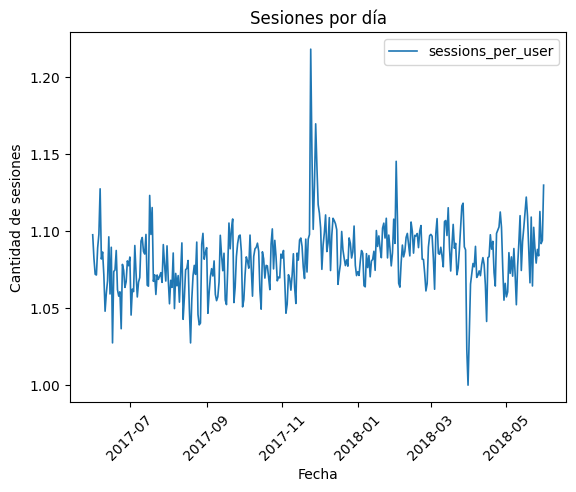

In [9]:
# Ahora calculamos la cantidad de sesiones que hay en un día. 
sessions_per_user = visits.groupby(['date']).agg( {'Uid': ['count', 'nunique']})
sessions_per_user.columns = ['n_sessions', 'n_users'] 
sessions_per_user['sessions_per_user'] = ( sessions_per_user['n_sessions'] / sessions_per_user['n_users'] )
plt.figure(figsize=(14,6))
sessions_per_user.plot(
    kind = 'line',
    linewidth = 1.2,
    title = 'Sesiones por día',
    xlabel = 'Fecha', 
    ylabel = 'Cantidad de sesiones',
    rot = 45,
    y = 'sessions_per_user',
)
plt.show

Podemos observar que durante los meses de noviembre y diciembre hay una mayor cantidad de sesiones, sin embargo estas no pasand de 1.30. 

La duración promedio, en segundos, de cada sesión es de:  643.506488592098  segundos


<AxesSubplot:>

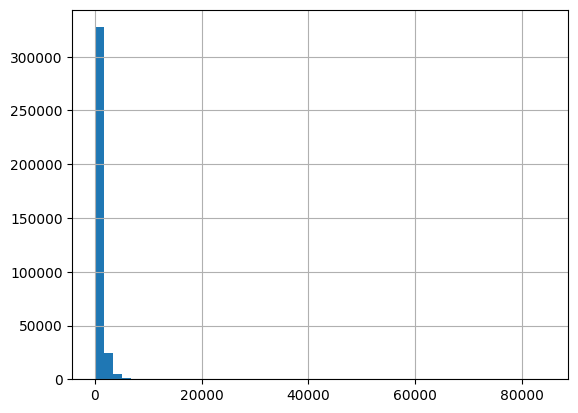

In [10]:
# Luego, identificaremos cuál es la duración de cada sesión 
visits['session_duration_sec'] = (visits['End Ts'] - visits['Start Ts']).dt.seconds 
print('La duración promedio, en segundos, de cada sesión es de: ',visits['session_duration_sec'].mean(),' segundos')
visits['session_duration_sec'].hist(bins=50)

Podemos observar que la distribución de la duración de las sesiones no es tan pareja, por lo que será necesrio calcular la moda en su lugar. 

In [11]:
print('La duración aproximada, en segundos, de cada sesión es de: ',visits['session_duration_sec'].mode().iloc[0],' segundos')

La duración aproximada, en segundos, de cada sesión es de:  60  segundos


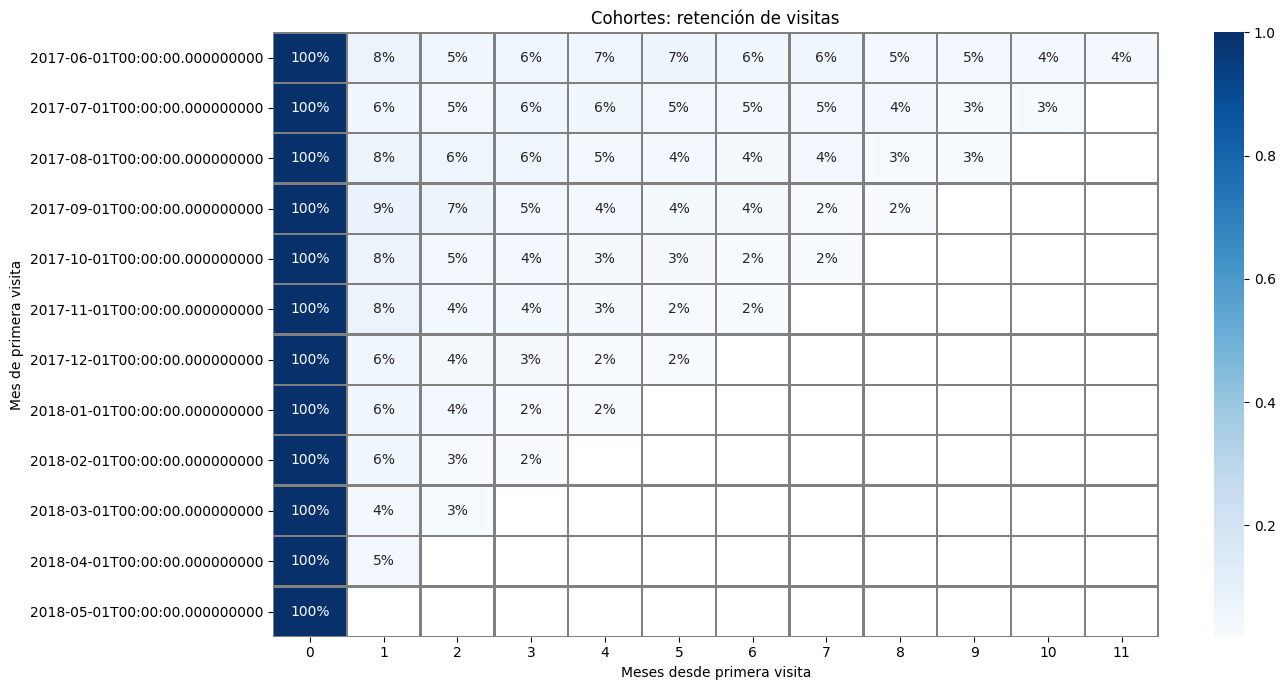

In [12]:
# Ahora identificaremos con qué frecuencia regresan los usuarios: 

first_visit_date_by_customers = visits.groupby('Uid')['Start Ts'].min()
first_visit_date_by_customers.name = 'first_visit_date'
visits = visits.join(first_visit_date_by_customers, on='Uid')

visits['first_visit_month'] = visits['first_visit_date'].dt.to_period('M').dt.to_timestamp()
visits['visit_month'] = visits['Start Ts'].dt.to_period('M').dt.to_timestamp()

visits['cohort_lifetime'] = (visits['visit_month'].dt.year - visits['first_visit_month'].dt.year) * 12 + \
                             (visits['visit_month'].dt.month - visits['first_visit_month'].dt.month)

cohorts = visits.groupby(['first_visit_month', 'cohort_lifetime'])['Uid'].nunique().reset_index()

initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_visit_month', 'Uid']]
initial_users_count = initial_users_count.rename(columns={'Uid': 'cohort_users'})

cohorts = cohorts.merge(initial_users_count, on='first_visit_month')
cohorts['retention'] = cohorts['Uid'] / cohorts['cohort_users']

retention_pivot = cohorts.pivot_table(
    index='first_visit_month',
    columns='cohort_lifetime',
    values='retention',
    aggfunc='sum'
)
plt.figure(figsize=(14, 7))
plt.title('Cohortes: retención de visitas')
sns.heatmap(retention_pivot, annot=True, fmt='.0%', cmap='Blues', linewidths=1, linecolor='gray')
plt.ylabel('Mes de primera visita')
plt.xlabel('Meses desde primera visita')
plt.show()

Podemos observar que la retención no es tan fuerte después del primer mes, sin embargo la retención despuès del primer mes si bien es baja, logra ser constante. 

#### 2. Ventas 
En este campo estudiaremos el comportamiento de las ventas. Para ello, identificaremos: 
- El periodo en el que los usuarios se convierten a clientes.
- La cantidad de pedidos que hacen durante un periodo
- El tamaño promedio de compra
- Y el dinero que traen las compras

In [13]:
# Primero identificaremos los periodos en los que los usuarios se convierten en clientes.

visits_clean = pd.read_csv('/datasets/visits_log_us.csv')
visits_clean['Start Ts'] = pd.to_datetime(visits_clean['Start Ts'])
first_visits = visits_clean.groupby('Uid')['Start Ts'].min().reset_index().rename(columns={'Start Ts': 'first_visit_ts'})
first_orders = orders.groupby('Uid')['Buy Ts'].min().reset_index().rename(columns={'Buy Ts': 'first_buy_ts'})
user_events = pd.merge(first_visits, first_orders, on='Uid', how='left')
user_events['conversion_days'] = (user_events['first_buy_ts'] - user_events['first_visit_ts']).dt.days
def label_conversion(days):
    if pd.isna(days):
        return 'No Conversion'
    elif days < 0:
        return 'Invalid (Buy before Visit)'
    else:
        return f'Conversion {days}d'

user_events['conversion_label'] = user_events['conversion_days'].apply(label_conversion)

pivot = pd.pivot_table(
    user_events,
    index='conversion_label',
    values='Uid',
    aggfunc='count'
)
pivot['percentage'] = (pivot['Uid'] / pivot['Uid'].sum() * 100).round(4)

pivot_sorted = pivot.sort_values(by='percentage', ascending=False)
print(pivot_sorted)

                      Uid  percentage
,conversion_label                     
,No Conversion      191646     83.9930
,Conversion 0.0d     26363     11.5542
,Conversion 1.0d      1011      0.4431
,Conversion 2.0d       563      0.2467
,Conversion 3.0d       434      0.1902
,...                   ...         ...
,Conversion 362.0d       1      0.0004
,Conversion 325.0d       1      0.0004
,Conversion 332.0d       1      0.0004
,Conversion 330.0d       1      0.0004
,Conversion 274.0d       1      0.0004
,
,[346 rows x 2 columns]


Podemos observar que un porcentaje sumamente significativo (aproximadamente el 84%) no se convierte en cliente, es decir, no realiza una compra. 
Por otra parte, dentro de los usuarios que si se convierten en clientes, podemos identificar que la mayoría realiza la compra el mismo dìa de su primera visita.
En ese sentido, es importante identificar los motivos por los que la gran mayoría no realizan una compra. Asimismo, es importante diseñar estrategias para que los usuarios realicen sus compras el mismo día en que ingresan a la plataforma. 

<AxesSubplot:xlabel='conversion_days', ylabel='cohort_month'>

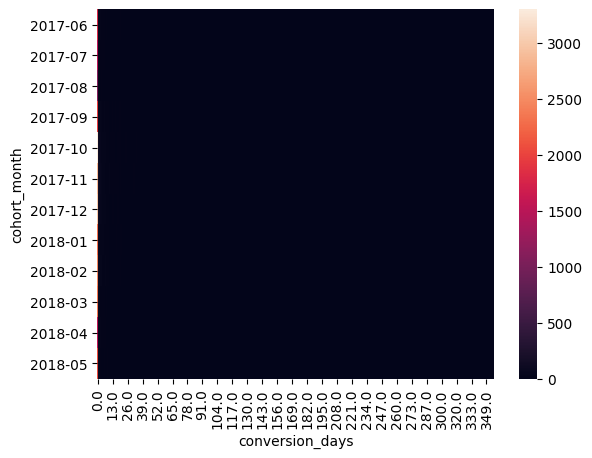

In [14]:
# Ahora realizaremos un análisis de cohortes 
user_events['cohort_month'] = user_events['first_visit_ts'].dt.to_period('M')
converted = user_events[user_events['conversion_days'].notna()]
conversion_timing = converted.groupby(['cohort_month', 'conversion_days'])['Uid'].count().reset_index()
conversion_timing.rename(columns={'Uid': 'user_count'}, inplace=True)
cohort_total = user_events.groupby('cohort_month')['Uid'].count()
cohort_converted = user_events[user_events['conversion_days'].notna()].groupby('cohort_month')['Uid'].count()
conversion_rate = (cohort_converted / cohort_total).reset_index(name='conversion_rate')
cohort_pivot = conversion_timing.pivot(index='cohort_month', columns='conversion_days', values='user_count').fillna(0)
sns.heatmap(cohort_pivot)

El análisis de cohorte mensual nos permite ver que en todos los meses, las compras se lllevan a cabo por lo general en el mismo día de registro. 

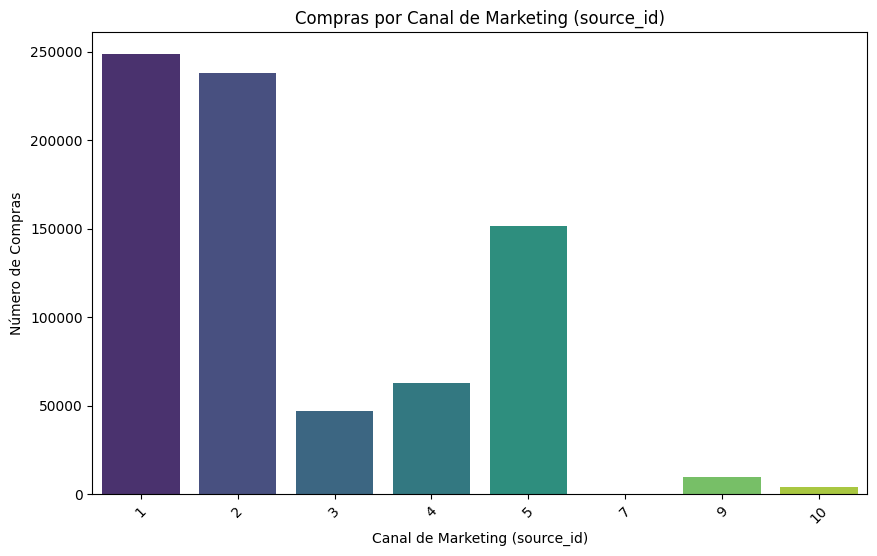

In [15]:
visits_clean.rename(columns={'Source Id': 'source_id'}, inplace=True)
visits_order = pd.merge(visits_clean, orders, on = 'Uid')
purchases = visits_order[visits_order['Buy Ts'].notna()]
purchases_by_channel = purchases.groupby('source_id')['Buy Ts'].count().reset_index()
purchases_by_channel.rename(columns={'Buy Ts': 'purchase_count'}, inplace=True)
purchases_by_channel = purchases_by_channel.sort_values(by='purchase_count', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(data=purchases_by_channel, x='source_id', y='purchase_count', palette='viridis')
plt.title('Compras por Canal de Marketing (source_id)')
plt.xlabel('Canal de Marketing (source_id)')
plt.ylabel('Número de Compras')
plt.xticks(rotation=45)
plt.show()


Podemos identificar que los canales de marketing más funcionales son aquellos identificados con el número 1, 2 y 5.

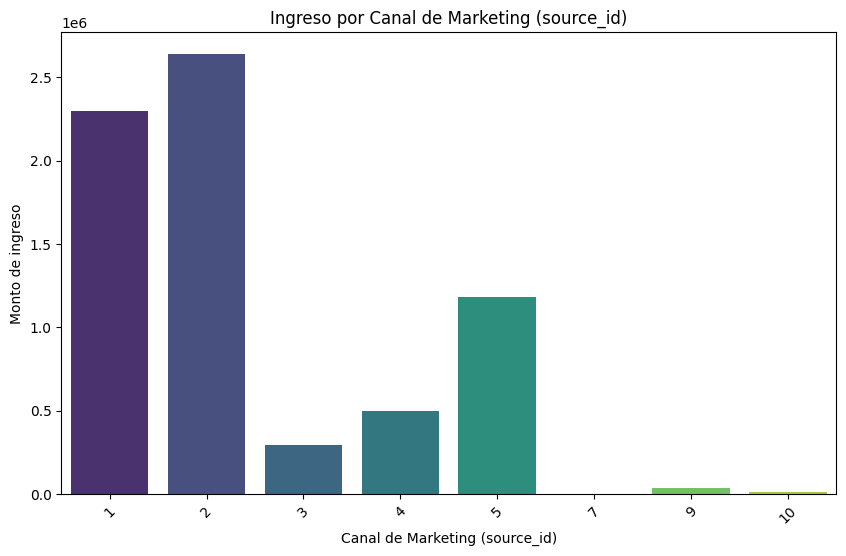

In [16]:
revenue = visits_order[visits_order['Revenue'].notna()]
revenue_by_channel = purchases.groupby('source_id')['Revenue'].sum().reset_index()
revenue_by_channel = revenue_by_channel.sort_values(by='Revenue', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(data=revenue_by_channel, x='source_id', y='Revenue', palette='viridis')
plt.title('Ingreso por Canal de Marketing (source_id)')
plt.xlabel('Canal de Marketing (source_id)')
plt.ylabel('Monto de ingreso')
plt.xticks(rotation=45)
plt.show()

Podemos identificar que la mayoría de los ingresos provienen de los canales de marketing 2, 1 y 5.

<AxesSubplot:title={'center':'Compras por mes'}, xlabel='Mes', ylabel='Cantidad de compras'>

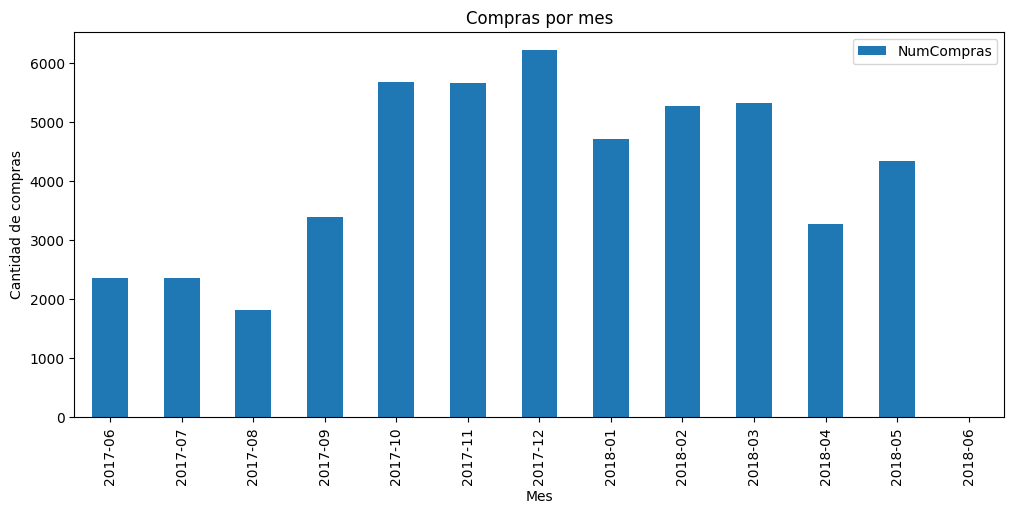

In [17]:
# Analicemos el comportamiento de nuestras compras por mes.

orders['OrderMonth'] = pd.to_datetime(orders['Buy Ts']).dt.to_period('M')
purchase_per_month = orders.groupby('OrderMonth').size()
purchase_df = purchase_per_month.to_frame(name='NumCompras')
purchase_df.plot(kind='bar', 
                 figsize=(12, 5), 
                 title="Compras por mes",
                 xlabel = 'Mes',
                 ylabel = 'Cantidad de compras')

Como podemos identificar, la mayor cantidad de compras se realiza durnate el último trimestre del año, es decir, de octubre a diciembre. En enero bajan las compras, pero se presenta un incremento nuevamente en febrero y marzo, quizá los usuarios se recuperen de la famosa cuesta de enero. 

In [18]:
# Ahora analicemos el comportamiento de nuestras compras por un periodo de tiempo determinado. 

start_date = '2017-10-01'
end_date = '2017-12-01'

purchases_filtered = orders[(orders['Buy Ts'] >= start_date) & (orders['Buy Ts'] <= end_date)]
total_purchases_period = len(purchases_filtered)
print(f"Total de compras entre {start_date} y {end_date}: {total_purchases_period}")

Total de compras entre 2017-10-01 y 2017-12-01: 11338


Con este código podemos identificar cuantas compras se realizan en un periodo determinado de tiempo. En este caso, toda vez que el periodo de mayor cantidad de compras identificado es el correspondiente al último trimestre del año, se tomó como base ese periodo. 

In [19]:
tamaño_compra = orders['Revenue'].mean()
revenue_per_user = orders.groupby('Uid')['Revenue'].sum()
revenue_per_user_avg = revenue_per_user.mean()
promedio_compra_individual = orders.groupby('Uid')['Revenue'].mean()
tamaño_promedio_compra_individual = promedio_compra_individual.mean()
print('El tamaño promedio de compra es de: ',tamaño_compra)
print('El tamaño promedio de compra por usuario es de: ',revenue_per_user_avg)
print('El tamaño promedio de cada compra individual por usuario es de: ', tamaño_promedio_compra_individual)

El tamaño promedio de compra es de:  4.999646930477041
,El tamaño promedio de compra por usuario es de:  6.901327930345262
,El tamaño promedio de cada compra individual por usuario es de:  4.093092887696445


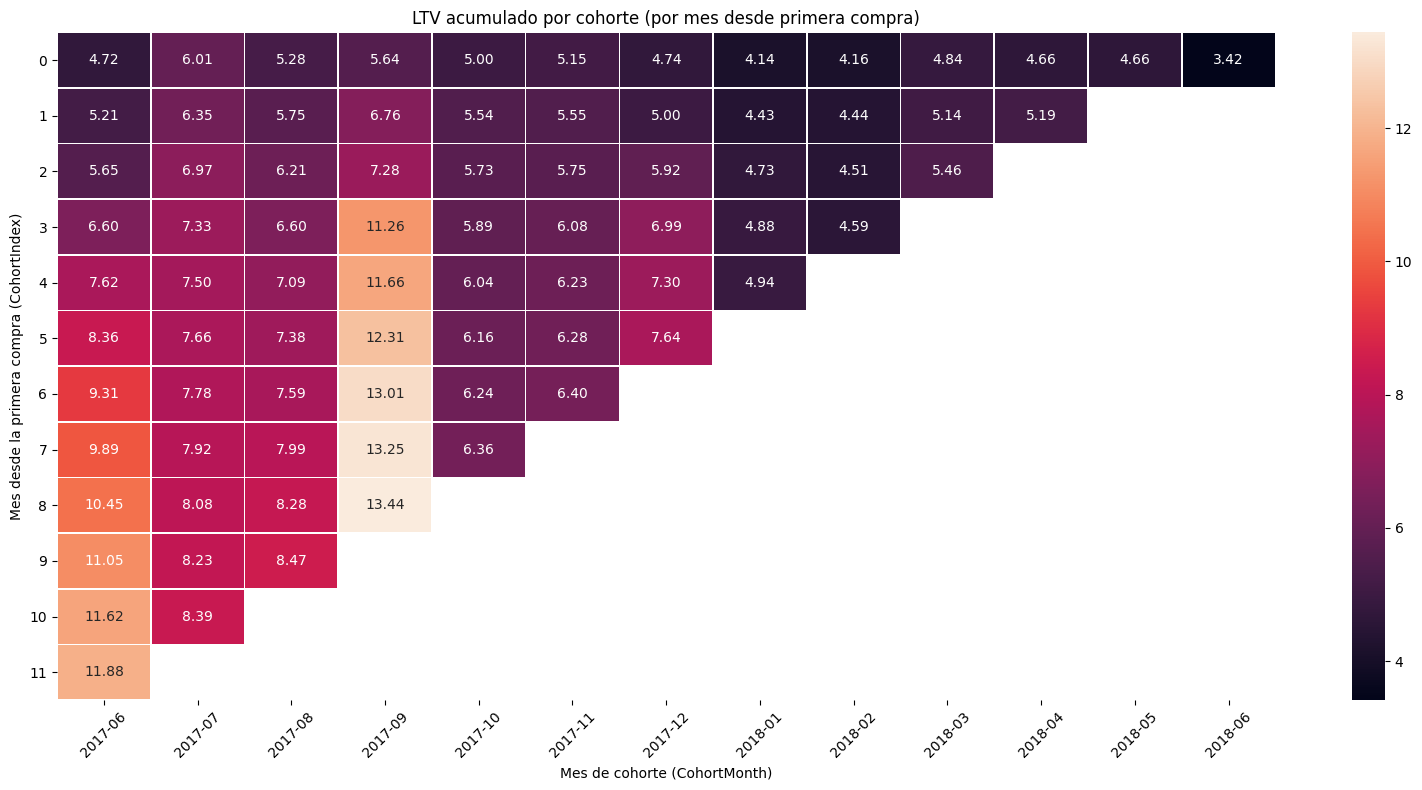

In [20]:
# Ahora identificaremos el LTV que traen las ventas. 
orders['FirstPurchaseMonth'] = orders.groupby('Uid')['Buy Ts'].transform('min').dt.to_period('M')
orders['CohortMonth'] = orders.groupby('Uid')['Buy Ts'].transform('min').dt.to_period('M')
ltv_por_cohorte = orders.groupby('FirstPurchaseMonth')['Revenue'].sum()
usuarios_por_cohorte = orders.groupby('FirstPurchaseMonth')['Uid'].nunique()
ltv_promedio_cohorte = ltv_por_cohorte / usuarios_por_cohorte
orders['CohortIndex'] = (orders['OrderMonth'].astype(int) - orders['CohortMonth'].astype(int))
revenue_cohort = orders.groupby(['CohortMonth', 'CohortIndex'])['Revenue'].sum().unstack(0)
usuarios_por_cohorte = orders.groupby('CohortMonth')['Uid'].nunique()
ltv_cohort = revenue_cohort.divide(usuarios_por_cohorte, axis=1)
ltv_acumulado = ltv_cohort.cumsum()
plt.figure(figsize=(16, 8))
sns.heatmap(ltv_acumulado, 
            annot=True, 
            fmt=".2f", 
            linewidths=0.5,
            )

plt.title('LTV acumulado por cohorte (por mes desde primera compra)')
plt.xlabel('Mes de cohorte (CohortMonth)')
plt.ylabel('Mes desde la primera compra (CohortIndex)')
plt.yticks(rotation=0)
plt.xticks(rotation=45)
plt.show()

Podemos identificar en nuestro análisis por cohorte que los usuarios tienden a generar la mayor parte de su valor en los primeros 3 a 6 meses desde su primera compra. Se observa un crecimiento constante del LTV en cohortes más antiguas, como las de mediados y finales de 2017, lo que sugiere una mejor retención o mayor volumen de compras en ese período. Por otra parte, podemos observar que las cohortes de 2018 precentan un mayorn LTV inicial, lo cual indica que los nuevos clientes son valiosos desde su inicio. Esta incremento en el LTV podría ser consecuencia de mejoras en la experiencia del usuario en el navegador, o en el valor del producto. 

#### 3. Marketing 
En este campo estudiaremos el comportamiento de las campañas de marketing. Para ello, identificaremos: 
- Cuánto dinero se gastó en total, por fuende adquisicón y a lo largo del tiempo. 
- El costo de adquisiciòn de clientes de cada una de las fuentes 
- La rentabilidad de las inversiones en marketing

In [21]:
# Comencemos identificando cuanto se gastó en total por toda la estrategia de marketing. 
total_costs = costs['costs'].sum()
print('En total, en estrategia de marketing se gastaron: ',total_costs)
costs.info()

En total, en estrategia de marketing se gastaron:  329131.62
,<class 'pandas.core.frame.DataFrame'>
,RangeIndex: 2542 entries, 0 to 2541
,Data columns (total 3 columns):
, #   Column     Non-Null Count  Dtype         
,---  ------     --------------  -----         
, 0   source_id  2542 non-null   int64         
, 1   dt         2542 non-null   datetime64[ns]
, 2   costs      2542 non-null   float64       
,dtypes: datetime64[ns](1), float64(1), int64(1)
,memory usage: 59.7 KB


<AxesSubplot:title={'center':'Monto gastado por fuente de adquisición'}, xlabel='Fuente de Adquisición', ylabel='Monto gastado'>

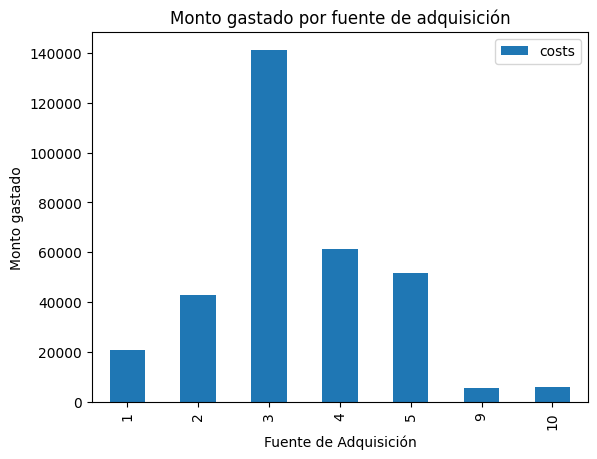

In [22]:
# Ahora identifiquemos cuando dinero se gastó por fuente de adquisición
costs_source = costs.groupby('source_id')['costs'].sum()
costs_source_df = costs_source.to_frame()
costs_source_df.plot(kind = 'bar',
                    xlabel='Fuente de Adquisición',
                    ylabel='Monto gastado',
                    title = 'Monto gastado por fuente de adquisición',
                    )

Podemos observar que en las estrategias de marketing identificadas con los números 3, 4 y 5 son en las que más se ha gastado, por lo que es indispensable identificar si estás han sido rentables o no. 

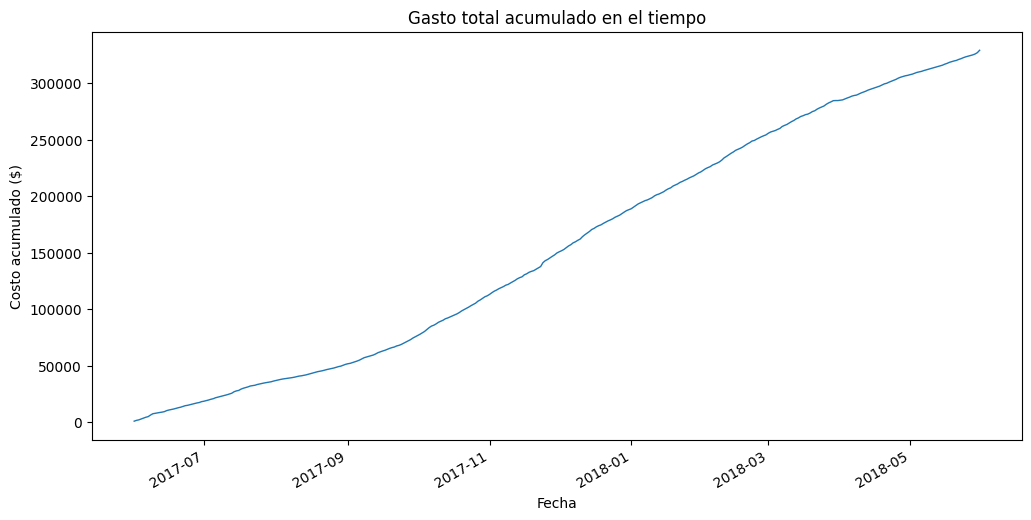

In [23]:
# Seguimos identiificando cuánto dinero se gastó por fuente de adquisición.
daily_costs = costs.groupby('dt')['costs'].sum()
daily_costs_acc = daily_costs.cumsum()
plt.figure(figsize=(12, 6))
daily_costs_acc.plot(linewidth=1)
plt.title('Gasto total acumulado en el tiempo')
plt.xlabel('Fecha')
plt.ylabel('Costo acumulado ($)')
plt.show()

Del gráfico podemos observar que los gastos en marketing han tenido un incremento sifnigicativo a lo largo del tiempo. Por ello es indispensable saber si este gasto es justificado o no para, en su caso, ajustar la estrategia de marketing. 

In [27]:
# Continuamos identificando el costo de adquisición de clientes de cada una de las fuentes
buyers = orders['Uid'].unique()
converted_visits = visits_clean[visits_clean['Uid'].isin(buyers)]
first_visit = converted_visits.sort_values('Start Ts').drop_duplicates('Uid')
user_per_source = first_visit.groupby('source_id')['Uid'].nunique().reset_index()
user_per_source.columns = ['source_id', 'users_acq']
cost_per_source = costs.groupby('source_id')['costs'].sum().reset_index()
cac_df = pd.merge(cost_per_source, user_per_source, on='source_id', how='inner')
cac_df['CAC'] = cac_df['costs'] / cac_df['users_acq']
print(cac_df)

   source_id      costs  users_acq        CAC
,0          1   20833.27       2899   7.186364
,1          2   42806.04       3506  12.209367
,2          3  141321.63      10473  13.493901
,3          4   61073.60      10296   5.931779
,4          5   51757.10       6931   7.467479
,5          9    5517.49       1088   5.071222
,6         10    5822.49       1329   4.381106


Podemos identificar que las fuentes con menor CAC son la 4, 9 y 10. Esto podría traducirse en que dichas campañas de marketing resultan eficientes y que tienen una relación costo beneficio sana. Se invierte cierta cantidad, pero se compensa la inversión con el retorno en forma de ingresos. 
Por el contrario, podemos identificar que las fuentes con CAC más altas son la 3, 2 y 5. Esto podría indicar que estas campañas no resultan eficientes ya que la relación costo-beneficio no es tan sana. Se invierte una importante cantidad que no necesariamente se compensa pues no se atrae a una cantidad suficente de usuarios. 

Para hacer un análisis más preciso sobre la eficiencia de éstas fuentes, es necesario identificar el ROMI

In [28]:
# Identifiquemos la rentabilidad de las inversiones
usuarios_con_pedido = orders['Uid'].unique()
visitas_convertidas = visits_clean[visits_clean['Uid'].isin(usuarios_con_pedido)]
primera_visita = visitas_convertidas.sort_values('Start Ts').drop_duplicates('Uid')
adquisiciones = primera_visita[['Uid', 'source_id']]
orders_fuente = pd.merge(orders, adquisiciones, on='Uid', how='inner')
ingresos_por_fuente = orders_fuente.groupby('source_id')['Revenue'].sum().reset_index()
ingresos_por_fuente.columns = ['source_id', 'revenue']
costos_por_fuente = costs.groupby('source_id')['costs'].sum().reset_index()
romi_df = pd.merge(ingresos_por_fuente, costos_por_fuente, on='source_id', how='inner')
romi_df['ROMI'] = (romi_df['revenue'] - romi_df['costs']) / romi_df['costs']
print(romi_df)

   source_id   revenue      costs      ROMI
,0          1  31090.55   20833.27  0.492351
,1          2  46923.61   42806.04  0.096191
,2          3  54511.24  141321.63 -0.614275
,3          4  56696.83   61073.60 -0.071664
,4          5  52624.02   51757.10  0.016750
,5          9   5759.40    5517.49  0.043844
,6         10   4450.33    5822.49 -0.235665


Teniendo estos datos, podemos identificar lo siguiente: 
- La fuente uno es la más rentable
- Las fuentes 3, 4 y 10 no son rentables e incluso genran pérdidas
- las fuentes 2, 5 y 9 no son tan rentables sin embargo no generan pérdidas. 

### Conclusiones

Derivado del análisis realizado, se identifica que la fuente más rentable y prioritaria para invertir es la fuente número 1. Esta fuente presenta indicadores sólidos de eficiencia y retorno, tales como:
- Un ROMI cercano al 50%, lo que implica una ganancia significativa sobre la inversión en marketing.
- Un CAC de 7.18, considerado razonable en relación con el ingreso generado y el volumen de usuarios adquiridos.
- Segundo lugar en ingresos totales por canal de marketing.
- Primer lugar en número de compras, lo que indica una alta capacidad de conversión.

Para maximizar los ingresos de la empresa, se recomienda optimizar la estrategia de la fuente número 2. Si bien su CAC es relativamente elevado, el ROMI es ligeramente positivo, y la fuente aporta ingresos importantes. Además, es el segundo canal con más compras realizadas. En este sentido, se sugiere reducir temporalmente la inversión en esta fuente mientras se rediseña la estrategia con el objetivo de mejorar la eficiencia, atraer más clientes y elevar el retorno.

Respecto a las fuentes 3, 4 y 10, se sugiere lo siguiente:

- Fuente 3 y 10: detener la inversión, ya que ambas muestran ROMI negativo y están generando pérdidas claras.
- Fuente 4: aunque actualmente opera con pérdida leve, podría ser rescatable. Se recomienda reducir la inversión y realizar ajustes estratégicos enfocados en aumentar la eficiencia y la retención de clientes.